In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
import warnings 
warnings.filterwarnings('ignore')
import nltk
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string
from gensim import parsing
from sklearn.datasets import fetch_20newsgroups
import re

In [2]:
# Code for cleaning 20NG dataset
transform_to_lower = lambda s: s.lower()
remove_emails = lambda s: re.sub(r'^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$', '', s)
remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

CLEAN_FILTERS = [remove_emails,
                strip_tags,
                strip_numeric,
                remove_emails,
                strip_punctuation, 
                strip_multiple_whitespaces, 
                transform_to_lower,
                remove_stopwords]

def cleaningPipe(document):
    processed_words = preprocess_string(document, CLEAN_FILTERS)
    
    return processed_words

def joinList(processed_words):
    return ' '.join(processed_words)

def basicStemming(text):
    return parsing.stem_text(text)


newsgroups_train = fetch_20newsgroups(subset = 'train')
newsgroups_test = fetch_20newsgroups(subset = 'test')

ng_df_train = pd.DataFrame({"news" : newsgroups_train["data"] ,"class" : newsgroups_train["target"]})
ng_df_train["cleanedText"] = ng_df_train["news"].apply(cleaningPipe).apply(joinList).apply(basicStemming)
ng_df_train.head()

,news,class,cleanedText
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,lerxst wam umd edu s thing subject car nntp po...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,guykuo carson u washington edu gui kuo subject...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,twilli ec ecn purdu edu thoma e willi subject ...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,jgreen amber joe green subject weitek p organ ...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,jcm head cfa harvard edu jonathan mcdowel subj...


In [3]:
ng_df_test = pd.DataFrame({"news" : newsgroups_test["data"] ,"class" : newsgroups_test["target"]})
ng_df_test["cleanedText"] = ng_df_test["news"].apply(cleaningPipe).apply(joinList).apply(basicStemming)
ng_df_test.head()

,news,class,cleanedText
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7,vmbk ubvmsd cc buffalo edu neil b gandler subj...
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5,rick miller subject x face organ line distribu...
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0,mathew subject strong weak atheism organ manti...
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17,bakken cs arizona edu dave bakken subject saud...
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19,livesei solntz wpd sgi com jon livesei subject...


In [4]:
num_points = 1000

ng_df_train = ng_df_train.iloc[:num_points,:]

vectorizer = TfidfVectorizer(stop_words = "english", min_df = 2, max_df = 0.95)
X_train_ng = vectorizer.fit_transform(np.array(ng_df_train["cleanedText"]))

X_train = pd.DataFrame(X_train_ng.toarray())
y_train = np.array(ng_df_train["class"])

In [5]:
num_points = 1000

ng_df_test = ng_df_test.iloc[:num_points,:]

X_test_ng = vectorizer.transform(np.array(ng_df_test["cleanedText"]))

X_test = pd.DataFrame(X_test_ng.toarray())
y_test = np.array(ng_df_test["class"])

# LDA

In [6]:
# Create an LDA object with K = 10 topics
lda_10 = LatentDirichletAllocation(n_components = 10, random_state = 42, learning_method = 'online', n_jobs = -1)

# Fit the LDA model to the document-term matrix
lda_10.fit(X_train)

# Create an LDA object with K = 20 topics
lda_20 = LatentDirichletAllocation(n_components = 20, random_state = 42, learning_method = 'online', n_jobs = -1)

# Fit the LDA model to the document-term matrix
lda_20.fit(X_train)

# Create an LDA object with K = 50 topics
lda_50 = LatentDirichletAllocation(n_components = 50, random_state = 42, learning_method = 'online', n_jobs = -1)

# Fit the LDA model to the document-term matrix
lda_50.fit(X_train)

LatentDirichletAllocation(learning_method='online', n_components=50, n_jobs=-1,
                          random_state=42)

In [7]:
# Print the top 20 words and their probabilities for each topic in the lda_10 model
for i, topic in enumerate(lda_10.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
rm (0.00013)
dwight (0.00013)
mail (0.00013)
embargo (0.00013)
dyer (0.00013)
facilit (0.00013)
uni (0.00013)
molest (0.00014)
cooki (0.00015)
informatik (0.00015)
vogt (0.00032)
vladimirov (0.00032)
fachbereich (0.00032)
strass (0.00032)
koelln (0.00032)
agn (0.00032)
fbihh (0.0006)
vesselin (0.00071)
bontchev (0.001)
hamburg (0.00104)


TOPIC 1:
suspend (0.00013)
guru (0.00013)
softwar (0.00013)
carcass (0.00013)
singl (0.00013)
krueger (0.00013)
rom (0.00013)
eliot (0.00013)
portabl (0.00013)
engin (0.00013)
digit (0.00013)
mb (0.00013)
noisi (0.00013)
toshiba (0.00013)
bonilla (0.00013)
mr (0.00013)
cd (0.00013)
informix (0.00013)
scope (0.00013)
scsi (0.00013)


TOPIC 2:
window (0.00013)
automat (0.00013)
delet (0.00013)
ftp (0.00013)
ad (0.00013)
program (0.00013)
win (0.00013)
sp (0.00013)
nodomain (0.00013)
file (0.00013)
nosubdomain (0.00013)
updat (0.00014)
script (0.0002)
util (0.00021)
norwai (0.00053)
odin (0.00053)
tromso (0.00055)
pedersen (0.00055)
svein (0.000

In [8]:
# Print the top 20 words and their probabilities for each topic in the lda_20 model
for i, topic in enumerate(lda_20.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
embellish (0.00013)
afternoon (0.00013)
code (0.00013)
cryptologist (0.00013)
accept (0.00013)
redirect (0.00013)
manag (0.00013)
abl (0.00013)
columbia (0.00013)
minster (0.00013)
human (0.00013)
voltag (0.00013)
parent (0.00013)
york (0.00013)
daughter (0.00013)
ethan (0.00013)
circuit (0.00013)
window (0.00013)
moral (0.00013)
amplifi (0.00013)


TOPIC 1:
guru (0.00013)
hear (0.00013)
thursdai (0.00013)
backcountri (0.00013)
grandpar (0.00013)
fallaci (0.00013)
replai (0.00013)
dog (0.00013)
worn (0.00013)
harder (0.00013)
stone (0.00013)
wall (0.00013)
pennsylvania (0.00013)
record (0.00013)
voluntari (0.00013)
pit (0.00013)
sporti (0.00013)
index (0.00013)
fs (0.00013)
carcass (0.00013)


TOPIC 2:
turn (0.00013)
brocku (0.00013)
automat (0.00013)
driver (0.00013)
printer (0.00013)
edu (0.00013)
program (0.00013)
tmc (0.00013)
file (0.00013)
font (0.00014)
window (0.00014)
updat (0.00015)
script (0.00034)
util (0.00071)
norwai (0.00092)
odin (0.00092)
tromso (0.00095)
pede

In [9]:
# Print the top 20 words and their probabilities for each topic in the lda_50 model
for i, topic in enumerate(lda_50.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
shoulder (0.00107)
killfil (0.00107)
agnost (0.00107)
samson (0.00133)
fripp (0.00138)
haaden (0.00138)
kongsberg (0.00139)
sheep (0.00139)
ingeniorhogskol (0.00139)
timmbak (0.00155)
mcl (0.00155)
ucsb (0.00155)
hausmann (0.00157)
bake (0.00244)
timmon (0.00254)
click (0.00311)
whirrr (0.00384)
joachim (0.00392)
kih (0.00392)
whirr (0.00409)


TOPIC 1:
guru (0.00013)
hear (0.00013)
thursdai (0.00013)
backcountri (0.00013)
grandpar (0.00013)
fallaci (0.00013)
replai (0.00013)
dog (0.00013)
worn (0.00013)
harder (0.00013)
stone (0.00013)
wall (0.00013)
pennsylvania (0.00013)
record (0.00013)
voluntari (0.00013)
pit (0.00013)
sporti (0.00013)
index (0.00013)
fs (0.00013)
carcass (0.00013)


TOPIC 2:
oldest (0.00013)
bosnia (0.00013)
speci (0.00013)
benedikt (0.00013)
evil (0.00013)
fewer (0.00013)
skrudland (0.00013)
explicitli (0.00013)
reput (0.00013)
shai (0.00013)
gcc (0.00013)
unplug (0.00013)
alphaean (0.00013)
misspel (0.00013)
sgi (0.00013)
kansa (0.00013)
partner (0.000

# MNF

In [10]:
# Create an NMF object with K = 10 topics
nmf_10 = NMF(n_components = 10, random_state = 42)

# Fit the NMF model to the document-term matrix
nmf_10.fit(X_train)

# Create an NMF object with K = 20 topics
nmf_20 = NMF(n_components = 20, random_state = 42)

# Fit the NMF model to the document-term matrix
nmf_20.fit(X_train)

# Create an NMF object with K = 50 topics
nmf_50 = NMF(n_components = 50, random_state = 42)

# Fit the NMF model to the document-term matrix
nmf_50.fit(X_train)

NMF(n_components=50, random_state=42)

In [11]:
# Print the top 20 words and their probabilities for each topic in the nmf_10 model
for i, topic in enumerate(nmf_10.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
articl (0.00298)
uk (0.00316)
state (0.00327)
rpi (0.00328)
usa (0.00336)
ohio (0.00337)
new (0.00343)
mail (0.00345)
file (0.00353)
purdu (0.00361)
distribut (0.00371)
cs (0.00475)
thank (0.00504)
cc (0.00509)
ac (0.00539)
host (0.00702)
nntp (0.0071)
post (0.00812)
univers (0.00966)
edu (0.01854)


TOPIC 1:
religion (0.00295)
john (0.00298)
reason (0.00308)
mean (0.00317)
come (0.00327)
argument (0.00338)
absolut (0.00347)
think (0.00352)
brian (0.00369)
sin (0.0039)
know (0.00395)
bibl (0.00468)
faith (0.00492)
belief (0.0052)
believ (0.0054)
peopl (0.0058)
truth (0.0061)
jesu (0.00974)
christian (0.01127)
god (0.01505)


TOPIC 2:
million (0.00404)
turkei (0.00413)
todai (0.00446)
massacr (0.00458)
russian (0.00467)
sera (0.00472)
zuma (0.00506)
govern (0.00545)
nazi (0.00546)
peopl (0.00597)
extermin (0.00638)
muslim (0.0067)
turk (0.0079)
armenia (0.00811)
serdar (0.00821)
argic (0.00844)
soviet (0.00965)
genocid (0.00974)
turkish (0.01601)
armenian (0.03363)


TOPIC 3:
o

In [12]:
# Print the top 20 words and their probabilities for each topic in the nmf_20 model
for i, topic in enumerate(nmf_20.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
indiana (0.00319)
address (0.00327)
cwru (0.00343)
mail (0.0036)
purdu (0.00374)
buffalo (0.00405)
distribut (0.00427)
new (0.00454)
cmu (0.00456)
usa (0.00473)
sale (0.00475)
cc (0.00552)
thank (0.00569)
rpi (0.00587)
cs (0.00774)
host (0.00908)
nntp (0.00929)
univers (0.00999)
post (0.01031)
edu (0.02355)


TOPIC 1:
life (0.00311)
arrog (0.00311)
argument (0.00316)
mean (0.00324)
think (0.00336)
john (0.00341)
come (0.00368)
absolut (0.00417)
brian (0.00439)
know (0.0045)
sin (0.00471)
bibl (0.00548)
peopl (0.0055)
believ (0.00567)
faith (0.00578)
belief (0.00597)
truth (0.0073)
jesu (0.01174)
christian (0.01331)
god (0.01812)


TOPIC 2:
million (0.0044)
turkei (0.00465)
todai (0.00492)
massacr (0.00502)
russian (0.00521)
sera (0.0053)
nazi (0.00559)
govern (0.00564)
zuma (0.00569)
peopl (0.00591)
muslim (0.00706)
extermin (0.00715)
turk (0.00886)
armenia (0.00914)
serdar (0.00924)
argic (0.00949)
soviet (0.01079)
genocid (0.0109)
turkish (0.01801)
armenian (0.03785)


TOPIC

In [13]:
# Print the top 20 words and their probabilities for each topic in the nmf_50 model
for i, topic in enumerate(nmf_50.components_):
    print(f"TOPIC {i}:")
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-20:]]
    top_probs = [round((topic[index] / sum(topic)), 5) for index in topic.argsort()[-20:]]
    for word, prob in zip(top_words, top_probs):
        print(f"{word} ({prob})")
    print("\n")

TOPIC 0:
movi (0.00492)
usc (0.00499)
distribut (0.00528)
ny (0.00543)
hugh (0.00581)
ec (0.00637)
univers (0.00658)
gif (0.00675)
aix (0.00677)
renssela (0.00678)
institut (0.00686)
troi (0.00696)
polytechn (0.00831)
wpi (0.01122)
host (0.0114)
nntp (0.01164)
post (0.01227)
washington (0.01367)
rpi (0.02694)
edu (0.02771)


TOPIC 1:
understand (0.004)
reason (0.00406)
think (0.00417)
follow (0.00438)
argument (0.00439)
conclus (0.00447)
religion (0.0052)
mean (0.00521)
peopl (0.00544)
true (0.00549)
know (0.00582)
arrog (0.00815)
bibl (0.00898)
believ (0.01039)
absolut (0.01095)
faith (0.01161)
belief (0.01519)
truth (0.01733)
god (0.01817)
christian (0.02301)


TOPIC 2:
million (0.00448)
turkei (0.00475)
todai (0.00506)
massacr (0.00512)
russian (0.00534)
sera (0.00545)
nazi (0.00564)
govern (0.00582)
zuma (0.00585)
peopl (0.0061)
muslim (0.00724)
extermin (0.00736)
turk (0.0091)
armenia (0.00939)
serdar (0.00948)
argic (0.00976)
soviet (0.01105)
genocid (0.01118)
turkish (0.0185)
ar

# Analysis

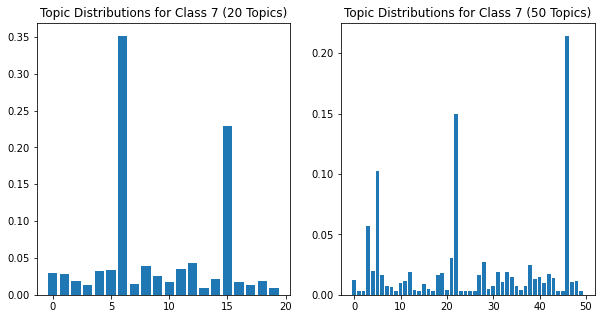

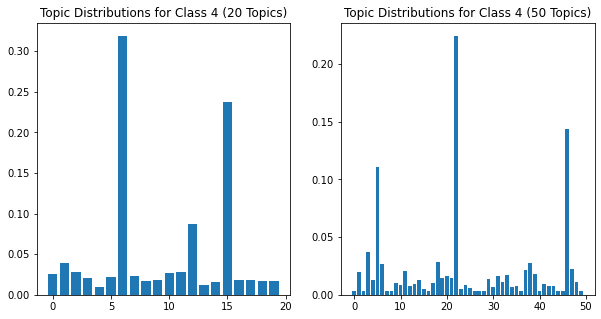

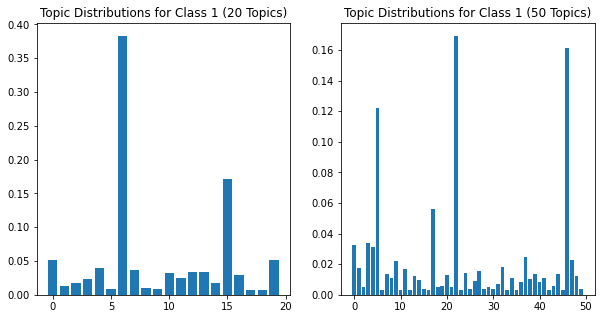

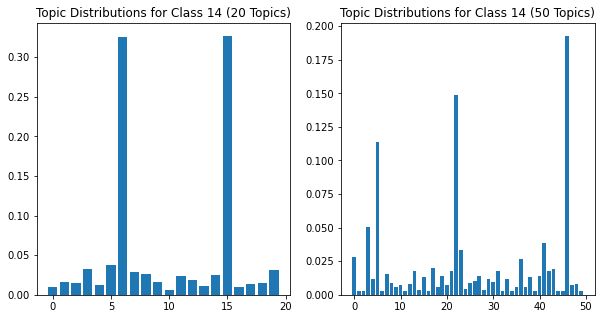

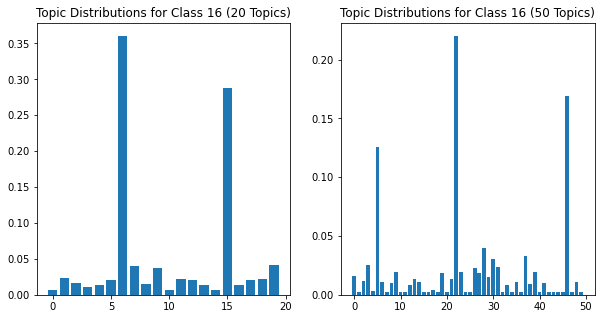

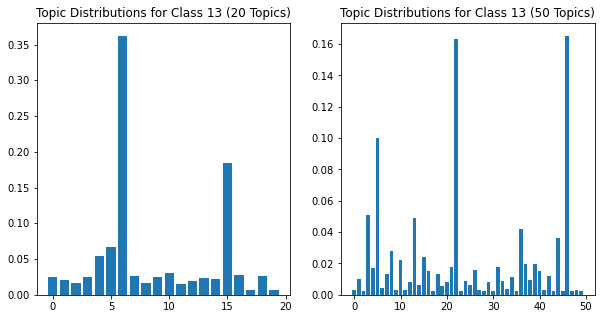

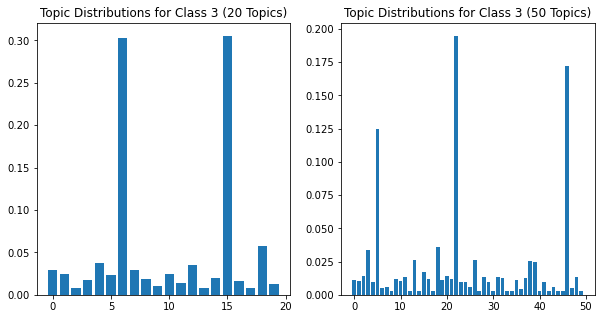

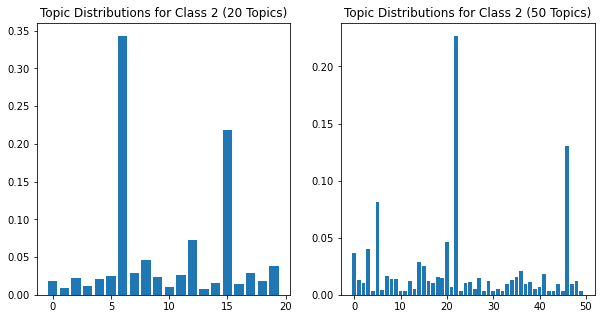

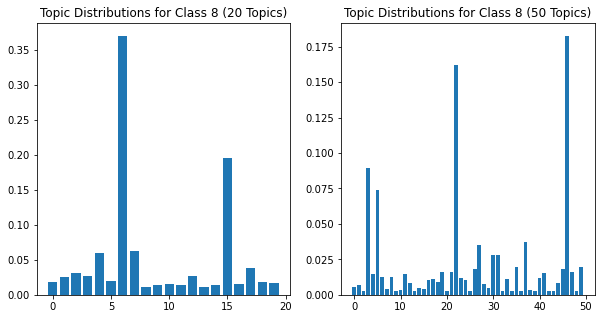

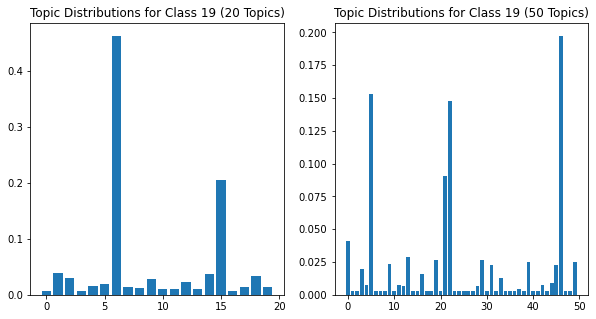

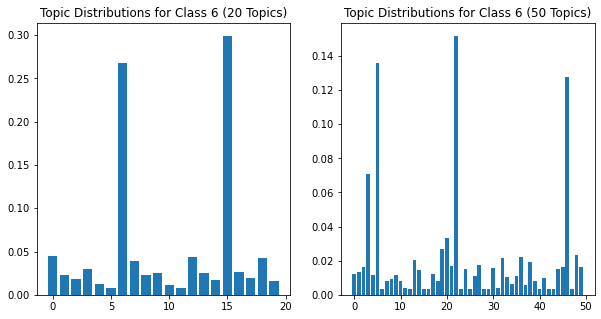

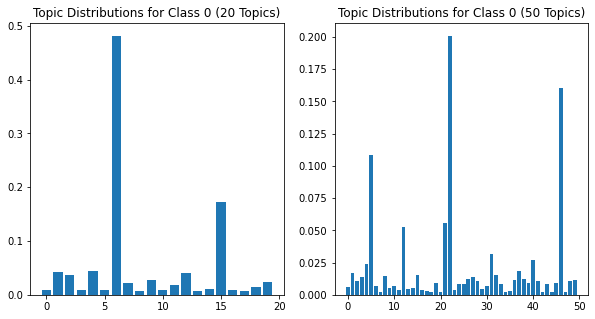

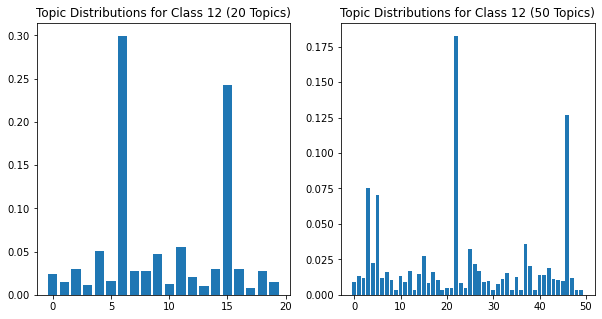

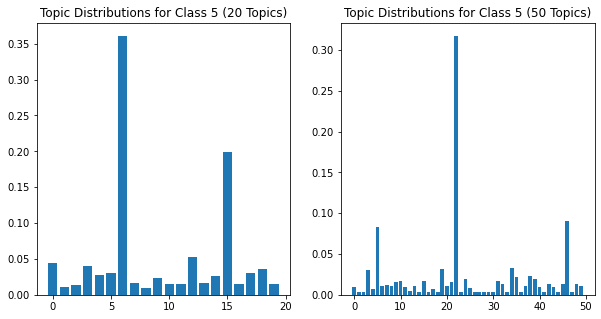

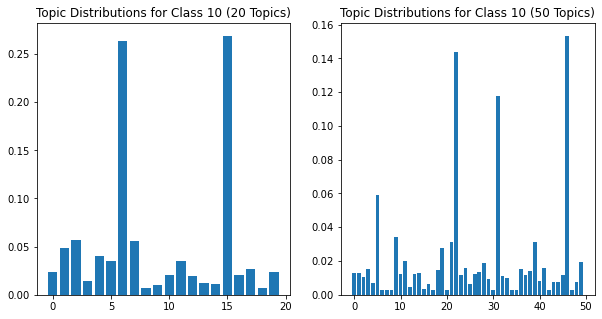

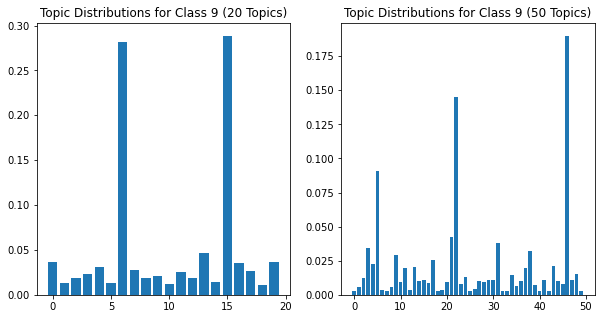

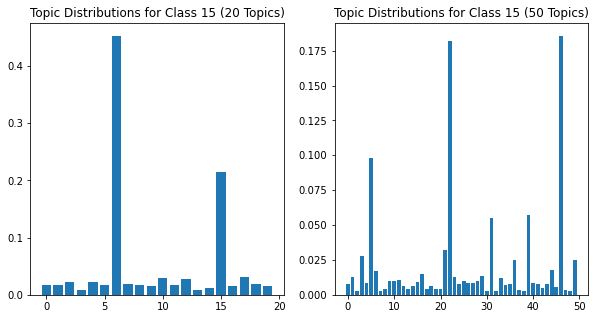

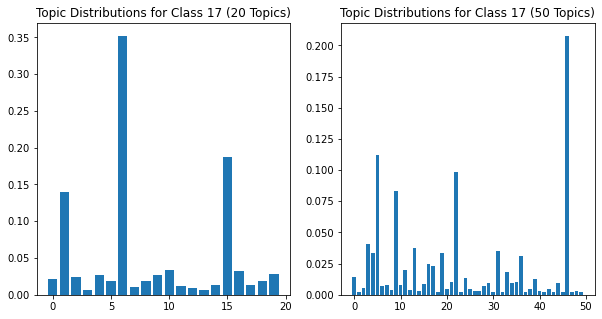

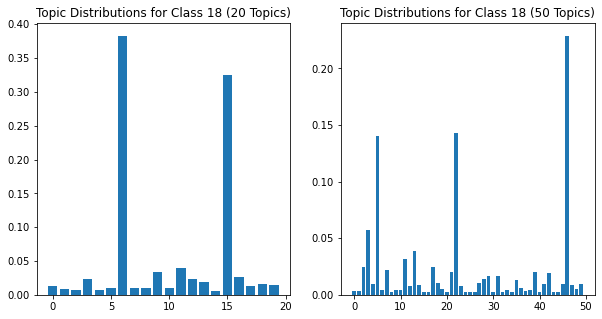

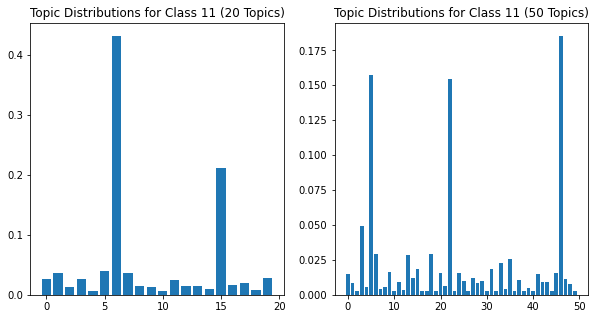

In [14]:
import matplotlib.pyplot as plt

# Fit the LDA models with 20 and 50 topics respectively
lda_20 = LatentDirichletAllocation(n_components = 20, random_state = 42)
lda_50 = LatentDirichletAllocation(n_components = 50, random_state = 42)

lda_20.fit(X_train)
lda_50.fit(X_train)

# Obtain the topic distributions for each document using the LDA models
doc_topic_dist_20 = lda_20.transform(X_train)
doc_topic_dist_50 = lda_50.transform(X_train)

# Create a list of the 20NG label classes
label_classes = ng_df_train["class"].unique()

# Loop through the label classes and visualize the topic distributions for each class
for label in label_classes:
    # obtain the indices of the documents in the current class
    indices = ng_df_train.index[ng_df_train["class"] == label].tolist()
    
    # Obtain the topic distributions for the documents in the current class using the LDA models
    topic_dist_20 = doc_topic_dist_20[indices, :].mean(axis = 0)
    topic_dist_50 = doc_topic_dist_50[indices, :].mean(axis = 0)
    
    # Plot the topic distributions for the current class
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
    ax1.bar(range(20), topic_dist_20)
    ax1.set_title(f"Topic Distributions for Class {label} (20 Topics)")
    ax2.bar(range(50), topic_dist_50)
    ax2.set_title(f"Topic Distributions for Class {label} (50 Topics)")
    plt.show()